In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from matplotlib.ticker import MaxNLocator

plt.rcParams['figure.figsize'] = [16, 5]

In [5]:
df = pd.read_csv('twitter.csv')
df = df.replace('None', 'martalempart')
users = ['RozeckaPL', 'GoTracz', 'martalempart', 'MichalakJerzy', 'KatarzynaObara', 'SutrykJacek']
since_date = '2017-01-01'
until_date = '2018-10-17'

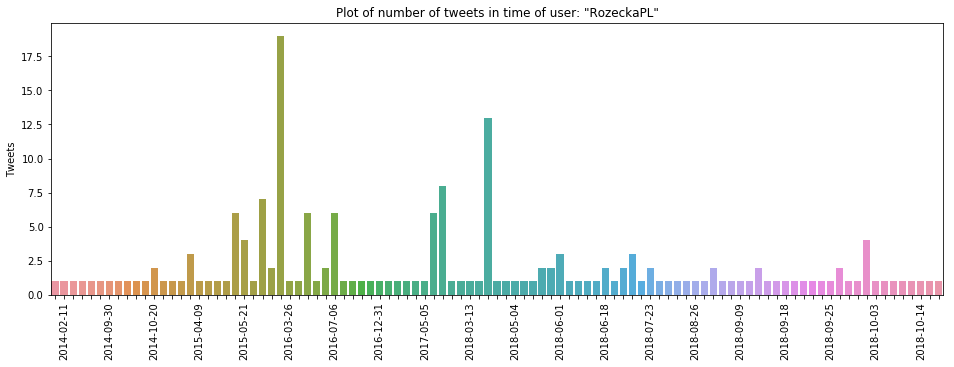

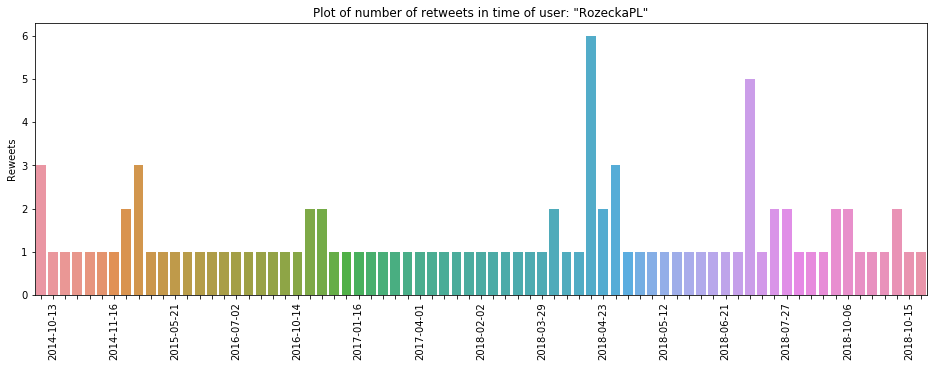

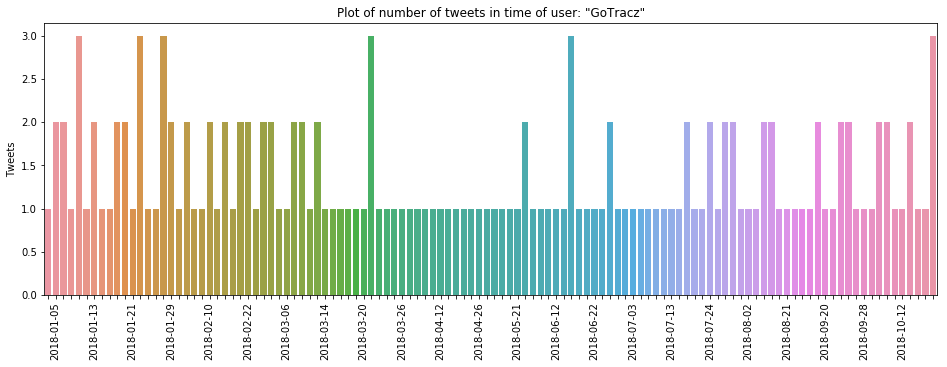

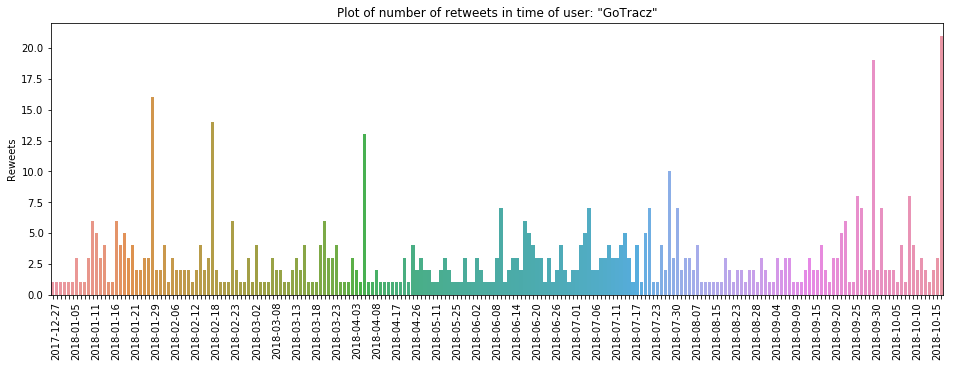

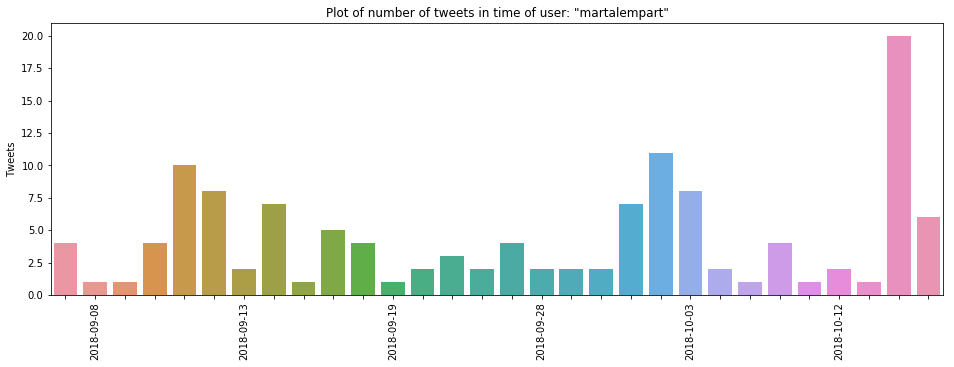

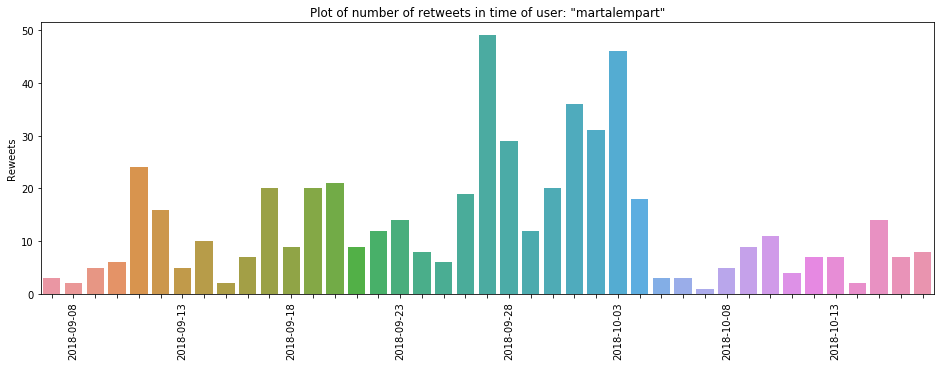

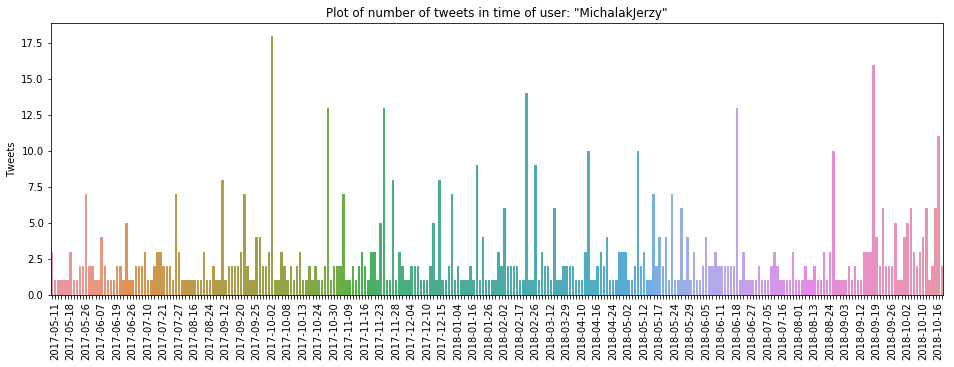

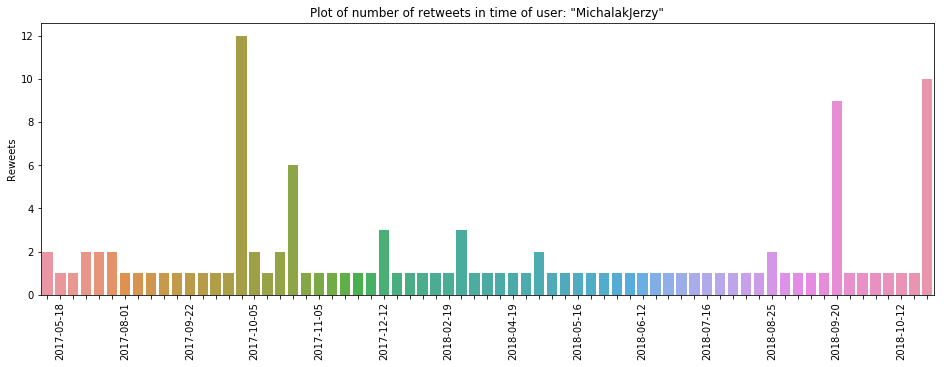

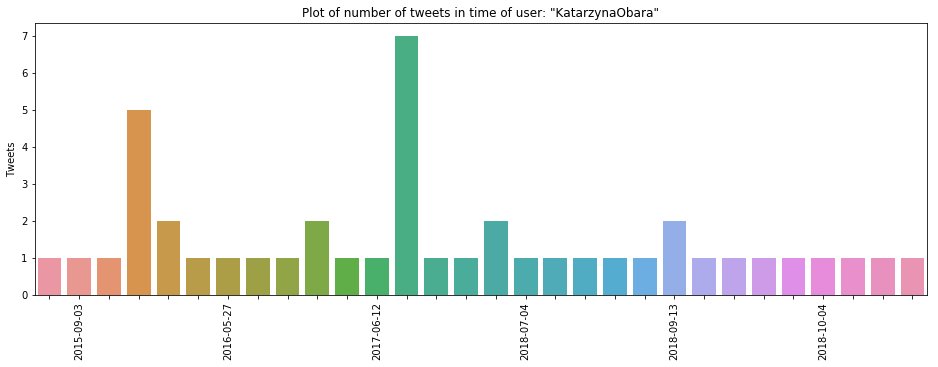

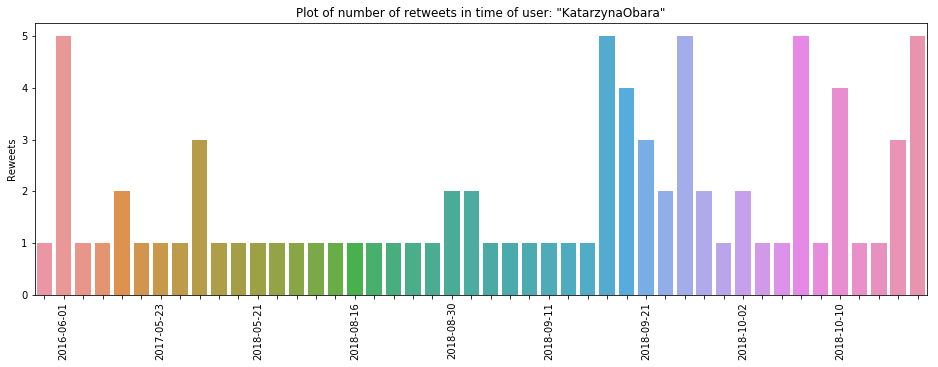

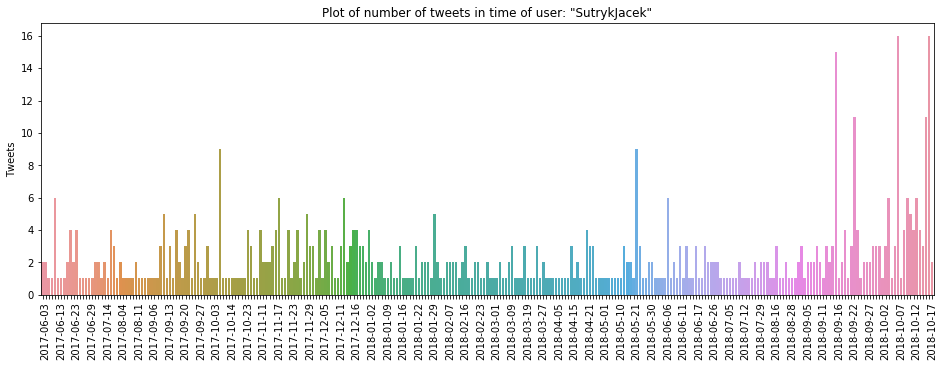

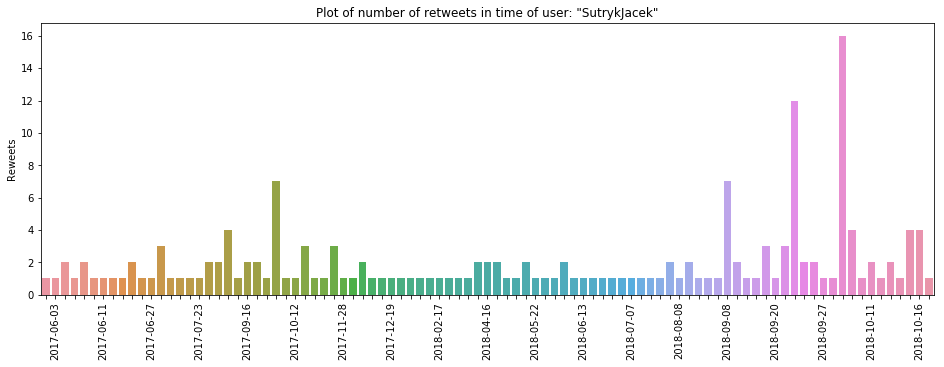

In [6]:
tweets = df.loc[df['username'] == df['user_rt']]
tweets = tweets.append(df.loc[df['user_rt'] == 'None'])

retweets = df.loc[df['username'] != df['user_rt']]
retweets = retweets[retweets['user_rt'] != 'None']

def get_number_of_tweets_in_time(tweets, username, since_date):
    user_tweets = tweets.loc[tweets['user_rt'] == username]
    user_tweets = user_tweets[user_tweets['date'] >= user_tweets['date'].min()]
    user_tweets = user_tweets.groupby(['date'])['tweet'].count()
    dates = []
    values = []
    
    for i, v in user_tweets.items():
        dates.append(datetime.datetime.strptime(i, "%Y-%m-%d").date())
        values.append(v)
    
    
    return dates, values

for user in users:
    dates, values = get_number_of_tweets_in_time(tweets, user, None)
    ax = sns.barplot(dates, values)
    ax.set_ylabel('Tweets')
    ax.set_title("Plot of number of tweets in time of user: \"{}\"".format(user))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    for ind, label in enumerate(ax.get_xticklabels()):
        if ind % 5 == 1:
            label.set_visible(True)
        else:
            label.set_visible(False)
    plt.show()
    
    dates, values = get_number_of_tweets_in_time(retweets, user, None)
    ax = sns.barplot(dates, values)
    ax.set_ylabel('Reweets')
    ax.set_title("Plot of number of retweets in time of user: \"{}\"".format(user))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    for ind, label in enumerate(ax.get_xticklabels()):
        if ind % 5 == 1:
            label.set_visible(True)
        else:
            label.set_visible(False)
    plt.show()
    


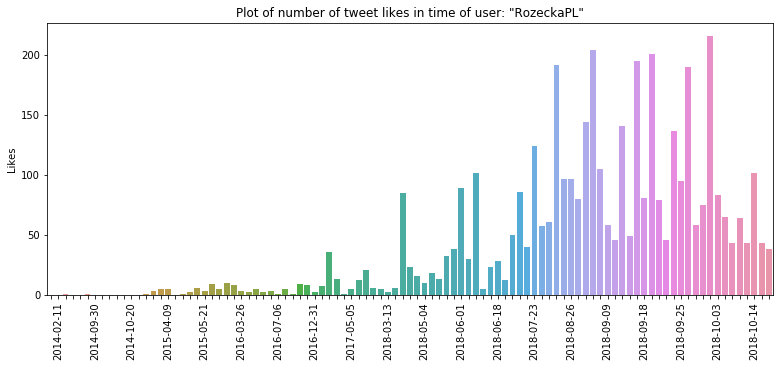

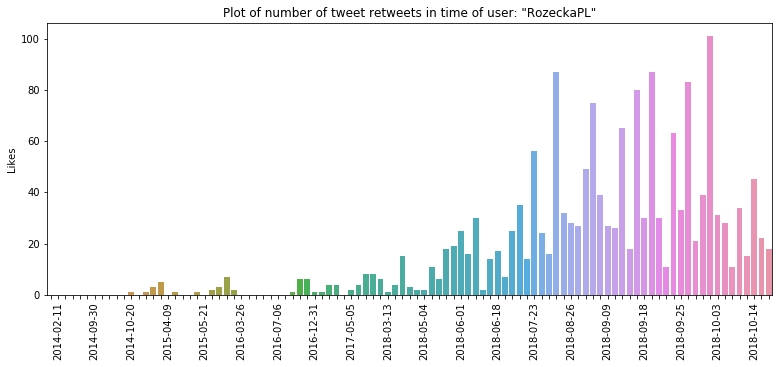

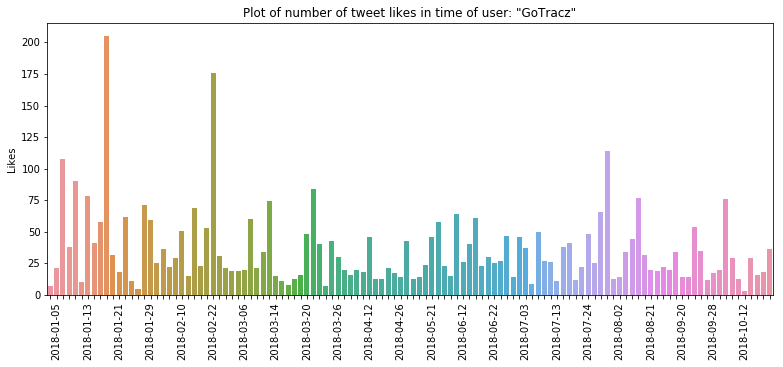

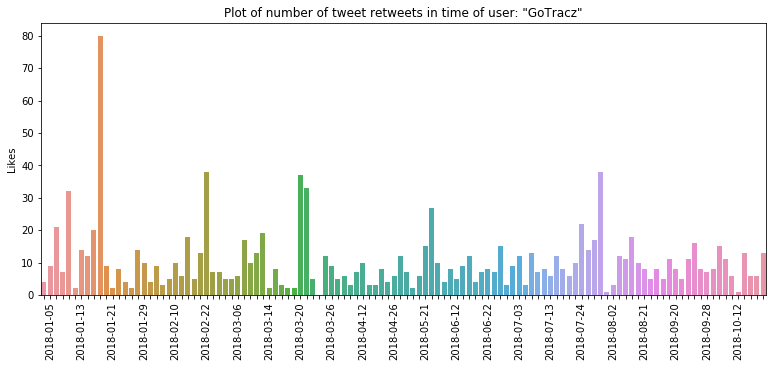

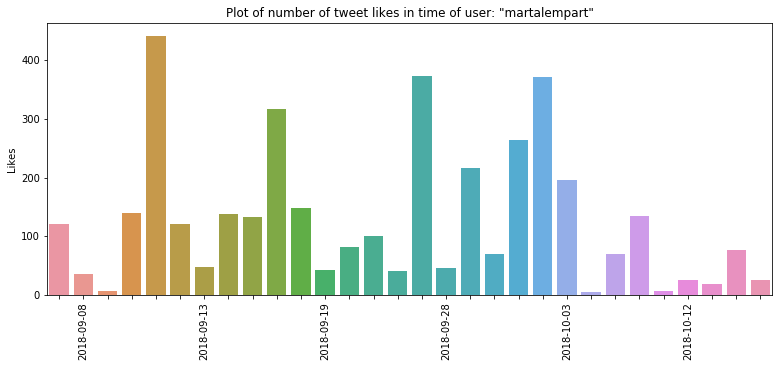

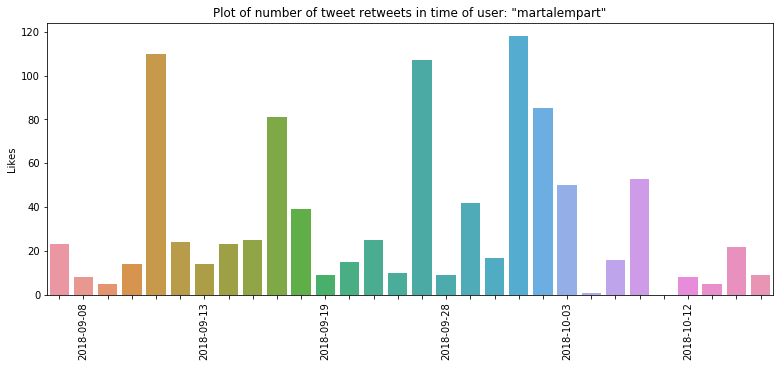

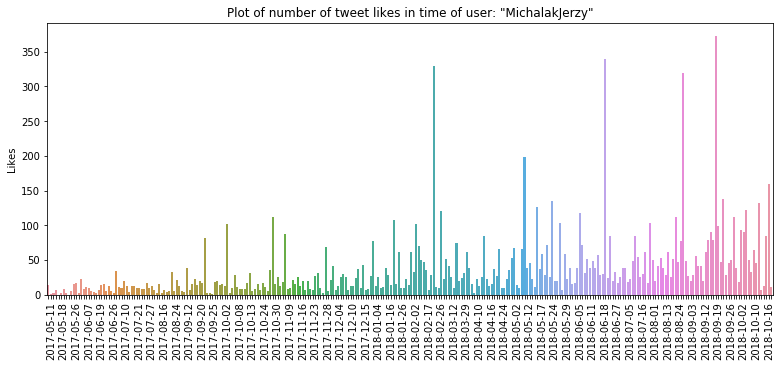

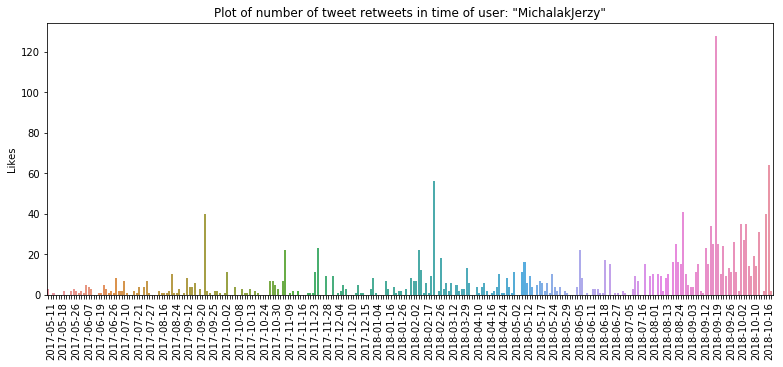

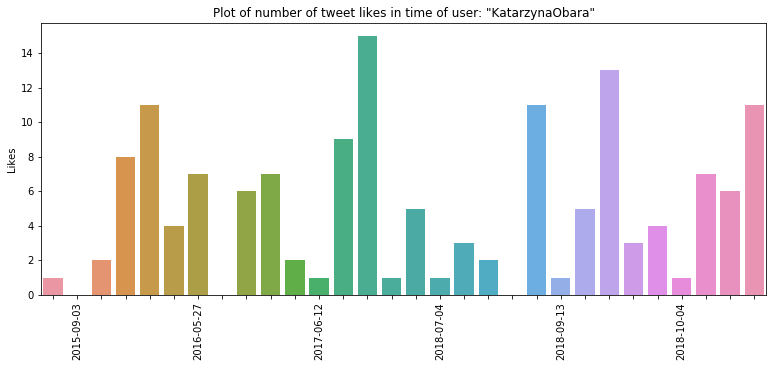

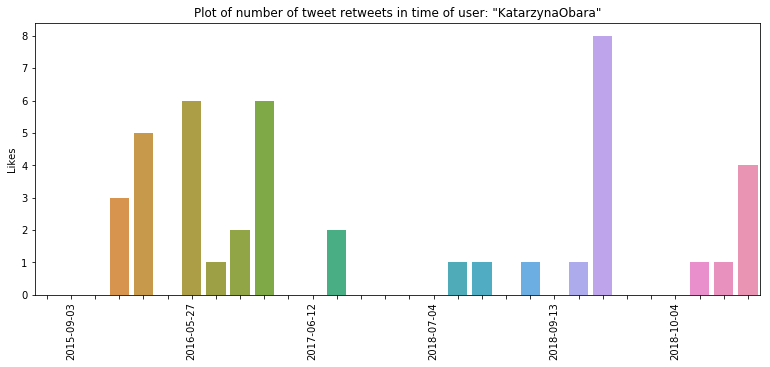

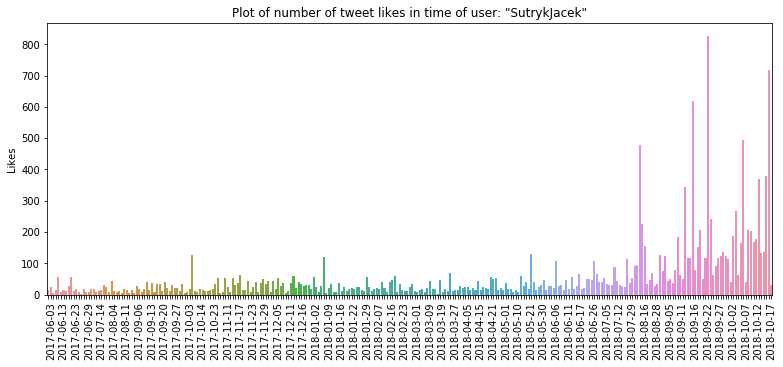

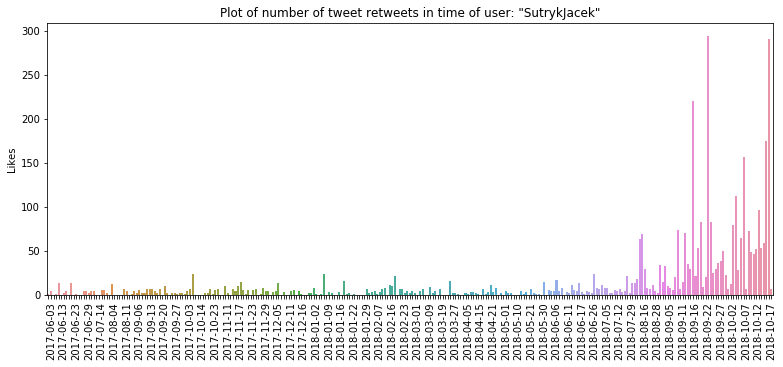

In [10]:
def get_number_of_likes_in_time(tweets, username, since_date):
    user_tweets = tweets.loc[tweets['username'] == username]
    user_tweets = user_tweets[user_tweets['date'] >= user_tweets['date'].min()]
    user_tweets = user_tweets.groupby(['date'])['likes'].sum()
    
    dates = []
    values = []
    
    
    for i, v in user_tweets.items():
        dates.append(datetime.datetime.strptime(i, "%Y-%m-%d").date())
        values.append(v)
        
    return dates, values


def get_number_of_retweets_in_time(tweets, username, since_date):
    user_tweets = tweets.loc[tweets['username'] == username]
    user_tweets = user_tweets[user_tweets['date'] >= user_tweets['date'].min()]
    user_tweets = user_tweets.groupby(['date'])['retweets'].sum()
    
    dates = []
    values = []
    
    
    for i, v in user_tweets.items():
        dates.append(datetime.datetime.strptime(i, "%Y-%m-%d").date())
        values.append(v)
        
    return dates, values

for user in users:
    dates, values = get_number_of_likes_in_time(tweets, user, None)
    
    ax = sns.barplot(dates, values)
    ax.set_ylabel('Likes')
    ax.set_title("Plot of number of tweet likes in time of user: \"{}\"".format(user))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    for ind, label in enumerate(ax.get_xticklabels()):
        if ind % 5 == 1:  # every 10th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)
    plt.show()
    
    
    dates, values = get_number_of_retweets_in_time(tweets, user, None)
    
    ax = sns.barplot(dates, values)
    ax.set_ylabel('Likes')
    ax.set_title("Plot of number of tweet retweets in time of user: \"{}\"".format(user))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    for ind, label in enumerate(ax.get_xticklabels()):
        if ind % 5 == 1:  # every 10th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)
    plt.show()


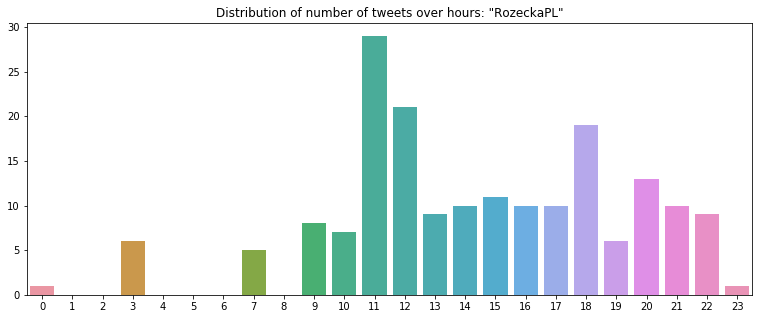

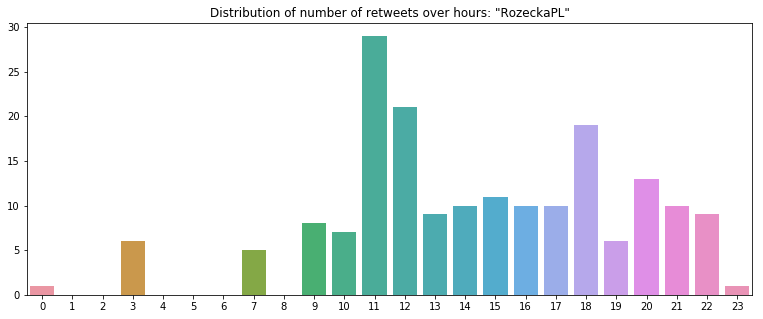

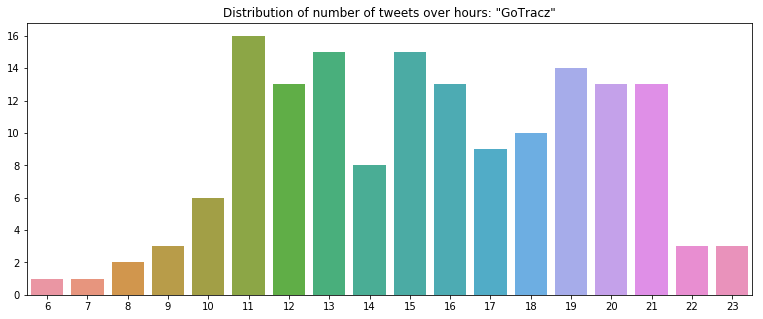

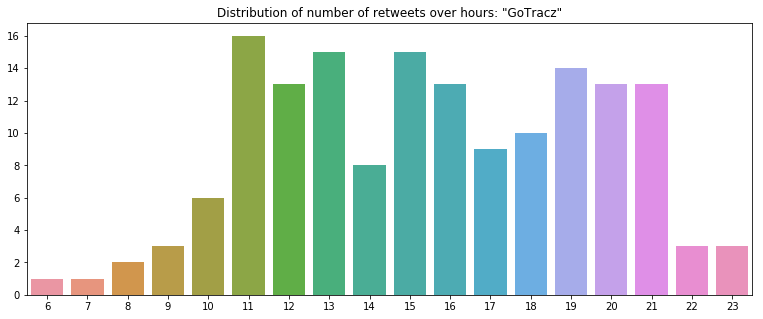

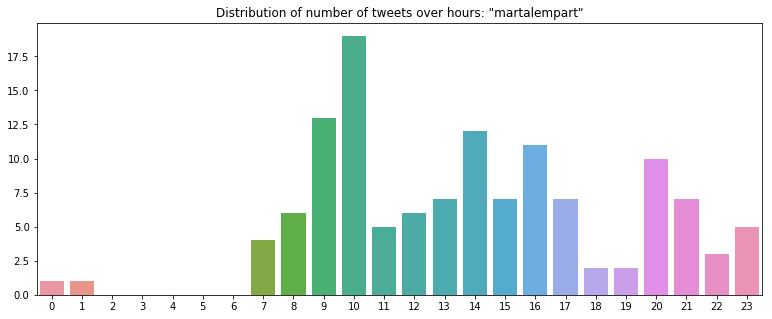

ValueError: min() arg is an empty sequence

In [11]:
for user in users:
    user_tweets = tweets.loc[tweets['username'] == user]
    user_tweets = user_tweets[user_tweets['date'] >= user_tweets['date'].min()]
    user_tweets['time'] = pd.to_datetime(user_tweets['time'])
    user_tweets.index = user_tweets['time']
    user_tweets = user_tweets.resample('H').count()
    
    ax = sns.barplot(user_tweets.index.hour.tolist(), user_tweets['tweet'].tolist())
    ax.set_title("Distribution of number of tweets over hours: \"{}\"".format(user))
    plt.show()
    
    user_tweets = tweets.loc[tweets['user_rt'] == user]
    user_tweets = user_tweets[user_tweets['date'] >= user_tweets['date'].min()]
    user_tweets['time'] = pd.to_datetime(user_tweets['time'])
    user_tweets.index = user_tweets['time']
    user_tweets = user_tweets.resample('H').count()
    
    ax = sns.barplot(user_tweets.index.hour.tolist(), user_tweets['tweet'].tolist())
    ax.set_title("Distribution of number of retweets over hours: \"{}\"".format(user))
    plt.show()
    

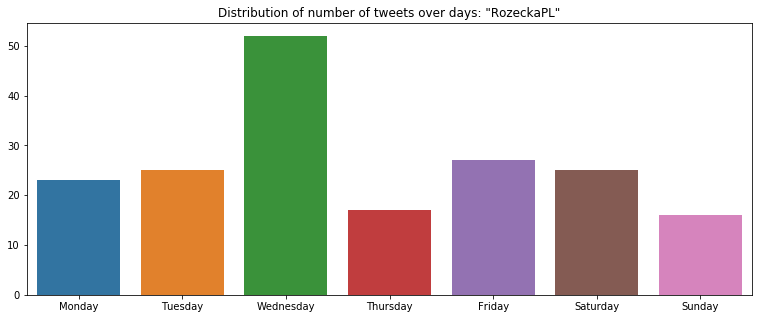

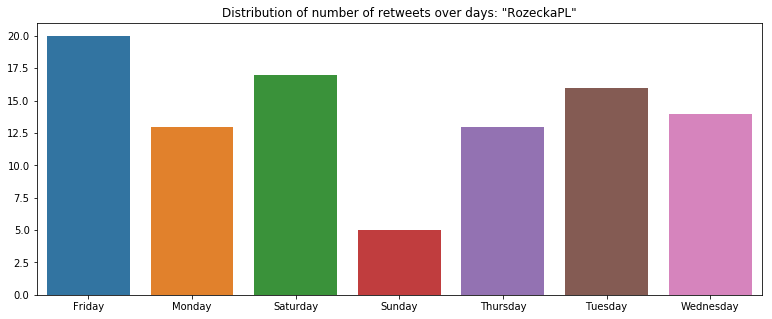

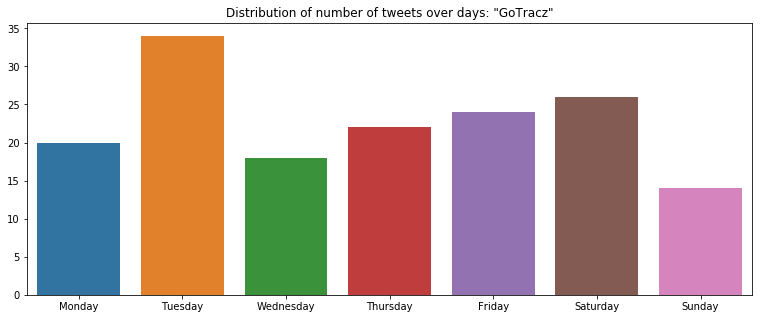

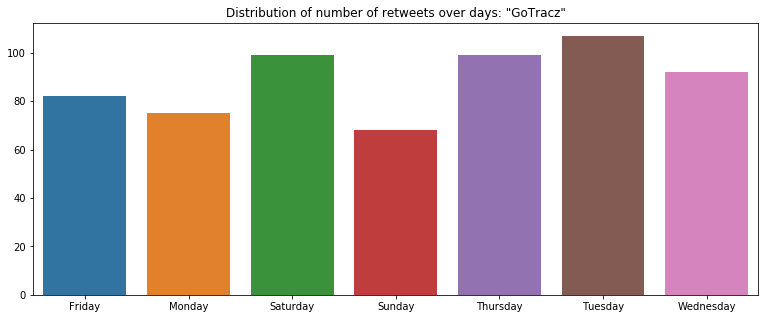

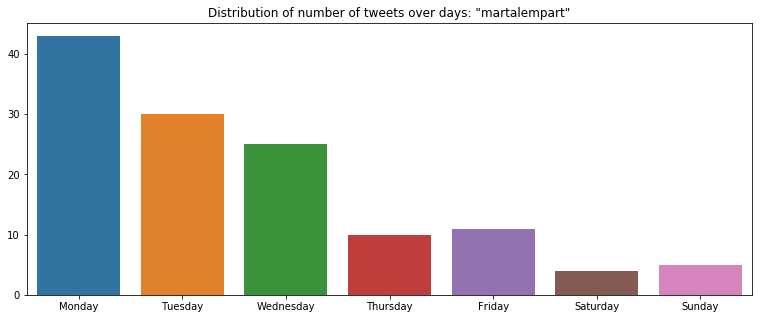

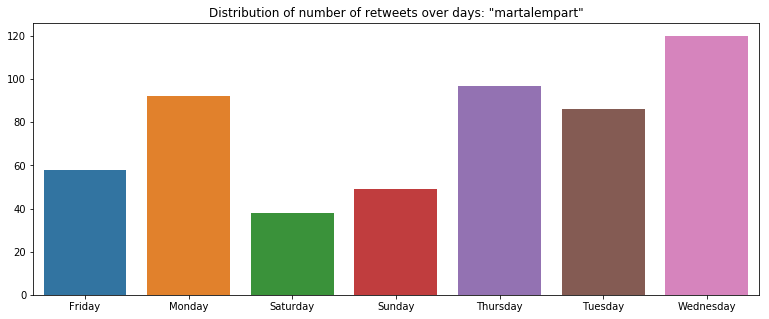

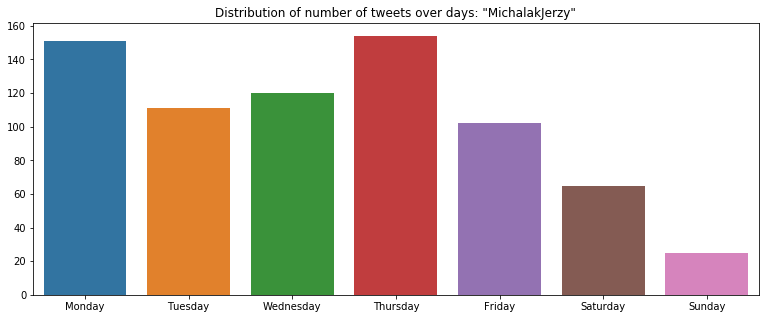

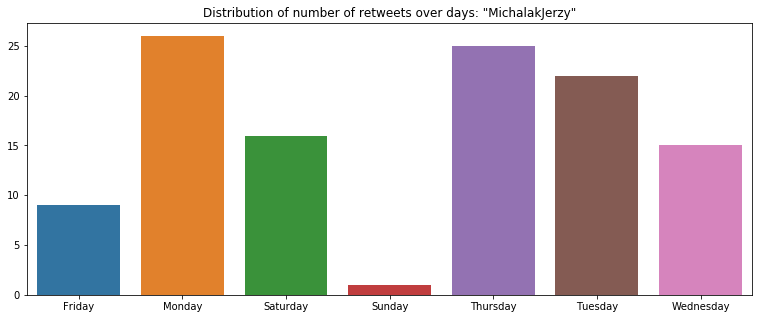

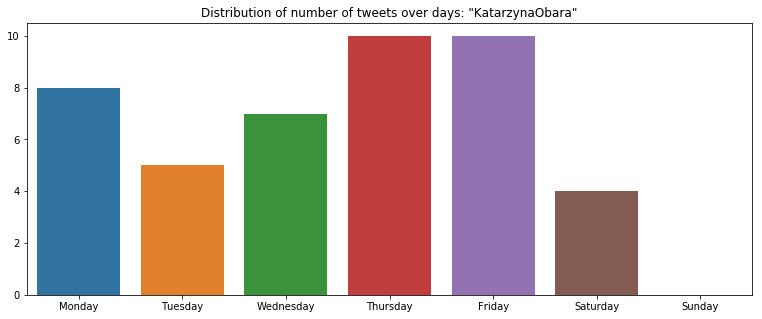

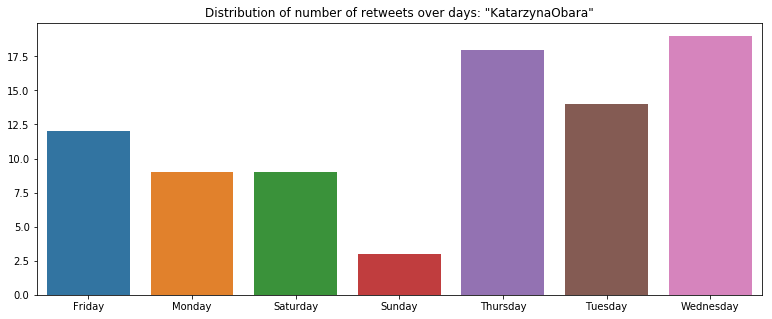

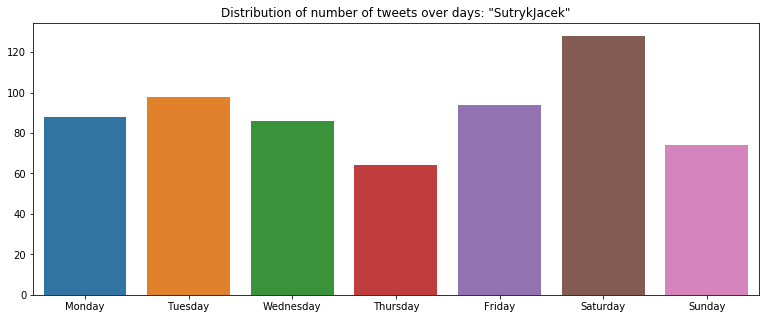

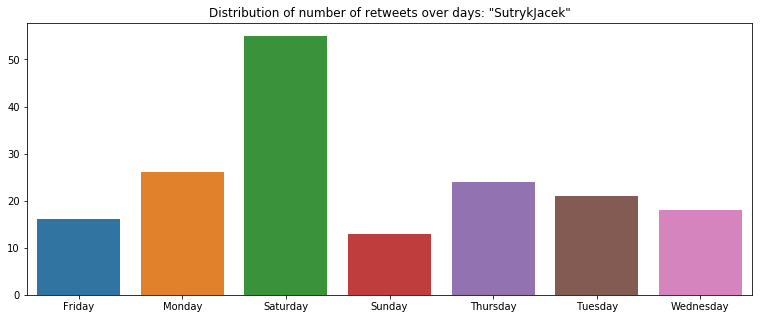

In [12]:
for user in users:
    user_tweets = tweets.loc[tweets['username'] == user]
    user_tweets = user_tweets[user_tweets['date'] >= user_tweets['date'].min()]
    user_tweets['date'] = pd.to_datetime(user_tweets['date'])
    user_tweets['date'] = user_tweets['date'].dt.weekday_name
    user_tweets = user_tweets.groupby(['date'])['tweet'].count()
    user_tweets = user_tweets.sort_index()
    
    user_tweets = user_tweets.reindex(index = ['Monday','Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    sns.barplot(user_tweets.index.tolist(), user_tweets.values.tolist()).set_title("Distribution of number of tweets over days: \"{}\"".format(user))
    plt.show()
    
    user_tweets = retweets.loc[retweets['user_rt'] == user]
    user_tweets = user_tweets[user_tweets['date'] >= user_tweets['date'].min()]
    user_tweets['date'] = pd.to_datetime(user_tweets['date'])
    user_tweets['date'] = user_tweets['date'].dt.weekday_name
    user_tweets = user_tweets.groupby(['date'])['tweet'].count()
    user_tweets = user_tweets.sort_index()
    
    sns.barplot(user_tweets.index.tolist(), user_tweets.values.tolist()).set_title("Distribution of number of retweets over days: \"{}\"".format(user))
    plt.show()
    

In [1]:
from polyglot.downloader import downloader
print(downloader.supported_languages_table("sentiment2", 78))

ModuleNotFoundError: No module named 'icu'

In [7]:
base = datetime.datetime.today()
numdays = 20
date_list = [base - datetime.timedelta(days=x) for x in range(0, numdays)]

In [8]:
date_list

[datetime.datetime(2018, 10, 18, 19, 25, 0, 598132),
 datetime.datetime(2018, 10, 17, 19, 25, 0, 598132),
 datetime.datetime(2018, 10, 16, 19, 25, 0, 598132),
 datetime.datetime(2018, 10, 15, 19, 25, 0, 598132),
 datetime.datetime(2018, 10, 14, 19, 25, 0, 598132),
 datetime.datetime(2018, 10, 13, 19, 25, 0, 598132),
 datetime.datetime(2018, 10, 12, 19, 25, 0, 598132),
 datetime.datetime(2018, 10, 11, 19, 25, 0, 598132),
 datetime.datetime(2018, 10, 10, 19, 25, 0, 598132),
 datetime.datetime(2018, 10, 9, 19, 25, 0, 598132),
 datetime.datetime(2018, 10, 8, 19, 25, 0, 598132),
 datetime.datetime(2018, 10, 7, 19, 25, 0, 598132),
 datetime.datetime(2018, 10, 6, 19, 25, 0, 598132),
 datetime.datetime(2018, 10, 5, 19, 25, 0, 598132),
 datetime.datetime(2018, 10, 4, 19, 25, 0, 598132),
 datetime.datetime(2018, 10, 3, 19, 25, 0, 598132),
 datetime.datetime(2018, 10, 2, 19, 25, 0, 598132),
 datetime.datetime(2018, 10, 1, 19, 25, 0, 598132),
 datetime.datetime(2018, 9, 30, 19, 25, 0, 598132),
 da